In [15]:
import yfinance as yf
import pandas as pd

# Télécharger les données boursières de Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Afficher un aperçu
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [12]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO

# URL des revenus de Tesla
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Extraction et nettoyage des données
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")
tesla_revenue = pd.read_html(StringIO(str(tables[0])))[0]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue.dropna()
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"[\$,]", "", regex=True).astype(float)

# Affichage des 5 dernières lignes
print(tesla_revenue.tail())


    Date  Revenue
10  2014   3198.0
11  2013   2013.0
12  2012    413.0
13  2011    204.0
14  2010    117.0


In [14]:
import yfinance as yf

# Télécharger les données boursières de Tesla
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Afficher un aperçu
gme_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [16]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO

# URL des revenus de GameStop
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Extraction et nettoyage des données
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")
gme_revenue = pd.read_html(StringIO(str(tables[0])))[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue = gme_revenue.dropna()
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"[\$,]", "", regex=True).astype(float)

# Affichage des 5 dernières lignes
print(gme_revenue.tail())


    Date  Revenue
10  2015   9296.0
11  2014   9040.0
12  2013   8887.0
13  2012   9551.0
14  2011   9474.0


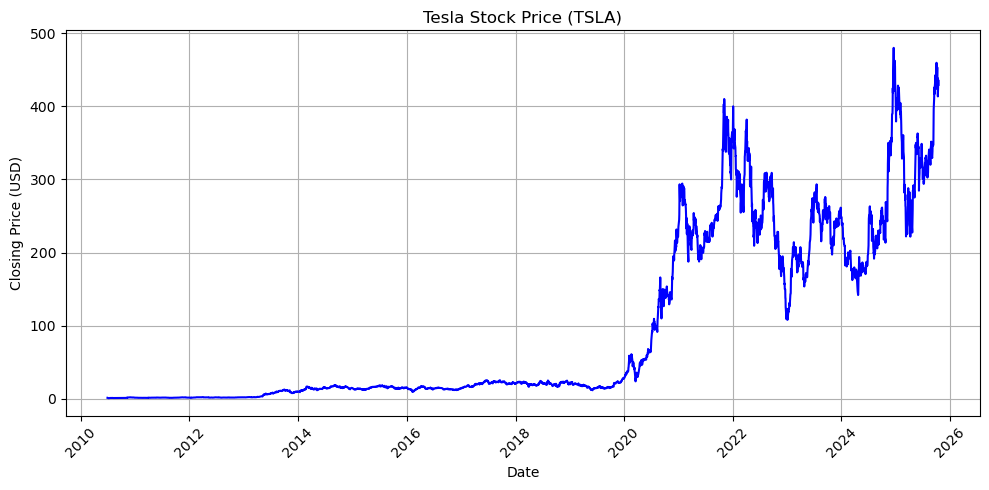

In [19]:
import matplotlib.pyplot as plt

# Function to plot Tesla stock price
def make_graph(data, title="Tesla Stock Price (TSLA)"):
    plt.figure(figsize=(10,5))
    plt.plot(data.index, data["Close"], color='blue')  # using the index directly
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Usage
make_graph(tesla_data)

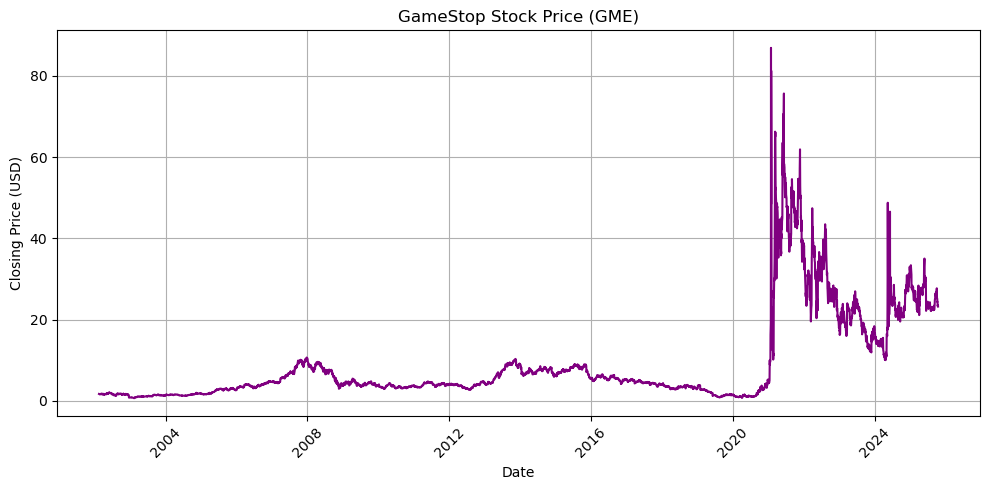

In [20]:
import matplotlib.pyplot as plt

# Fonction générique pour tracer le graphique d'une action
def make_graph(data, title="GameStop Stock Price (GME)"):
    plt.figure(figsize=(10,5))
    plt.plot(data.index, data["Close"], color='purple')  # prix de clôture
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Utilisation sur les données GameStop
make_graph(gme_data)